In [2]:
import pandas as pd
import os

DATASET_FILENAME = os.getcwd() + '/data/compas.csv'

dataset = pd.read_csv(DATASET_FILENAME)
targets = dataset['two_year_recid']
dataset = dataset.drop('two_year_recid',axis=1)
from scorer import *

## Score demonstrations

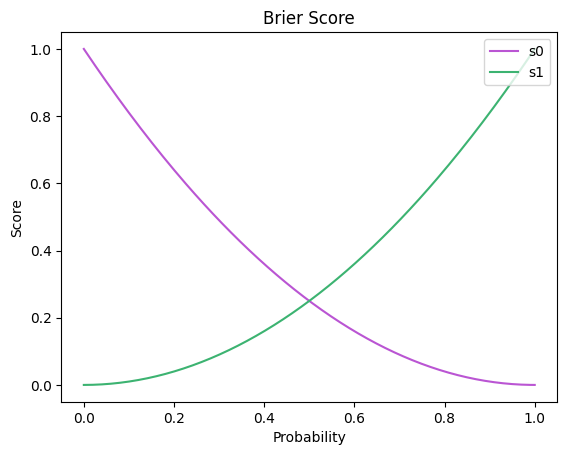

In [2]:
BrierScorer().plot()

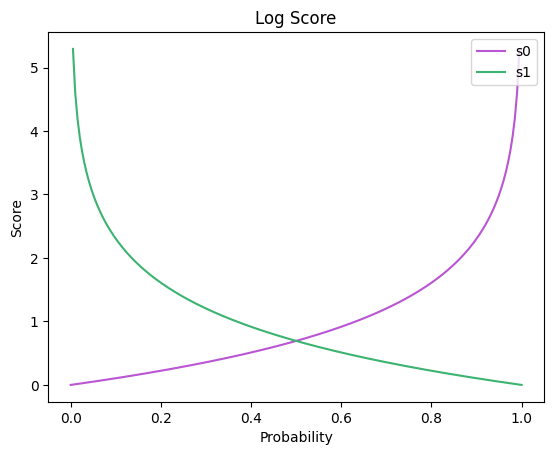

In [3]:
LogScorer().plot()

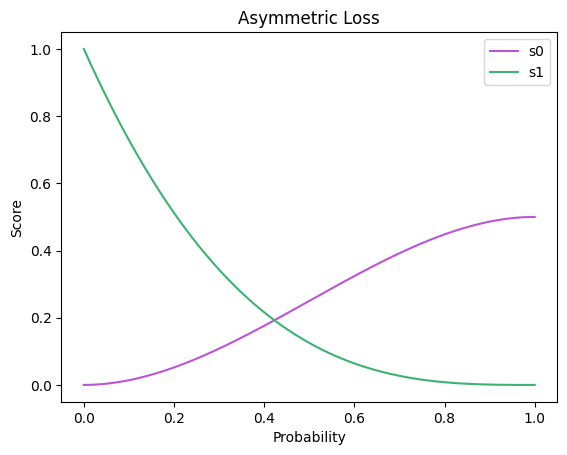

In [3]:
s0 = lambda p: p**2 * (3/2-p)
s1 = lambda p: (1-p)**3

CustomScorer(s0,s1,"Asymmetric Loss").plot()

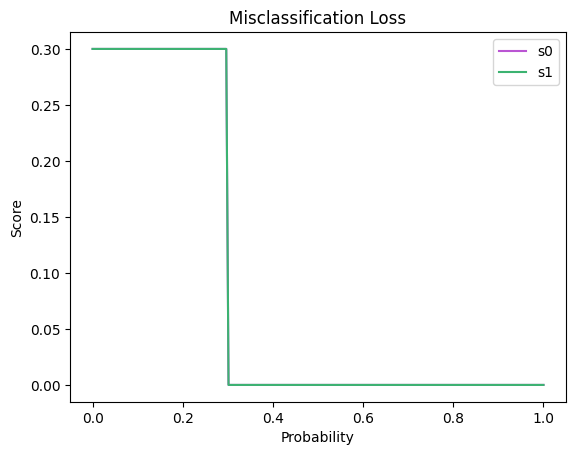

In [10]:
s0 = lambda p: 0 if p<0.3 else 0.7
s1 = lambda p: 0.3 if p<0.3 else 0

CustomScorer(s1,s1,"Misclassification Loss").plot()